In [1]:
import cv2

happy = []

sad = []

#get images for happy
for i in range(75):
  if(i<9):
    string = "/content/drive/My Drive/happy/000{}.jpg"
  elif(i<99):
    string = "/content/drive/My Drive/happy/00{}.jpg"
  elif(i<999):
    string = "/content/drive/My Drive/happy/0{}.jpg"
  num = i+1
  string = string.format(num)
  img = cv2.imread(string)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   # BGR -> RGB
  happy.append(img)

#get images for sad
for i in range(75):
  if(i<9):
    string = "/content/drive/My Drive/sad/000{}.jpg"
  elif(i<99):
    string = "/content/drive/My Drive/sad/00{}.jpg"
  elif(i<999):
    string = "/content/drive/My Drive/sad/0{}.jpg"
  num = i+1
  string = string.format(num)
  img = cv2.imread(string)
  img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)   # BGR -> RGB
  sad.append(img)

print("images loaded")


images loaded


In [0]:
import numpy as np 
#set training and testing data
percent_train = 0.9
happy_train = []
happy_test = []
sad_train = []
sad_test = []
for i in range(int(percent_train*len(happy))):
  happy_train.append(happy[i]) 
for i in range(len(happy)-len(happy_train)):
  happy_test.append(happy[i+len(happy_train)])
for i in range(int(percent_train*len(sad))):
  sad_train.append(sad[i]) 
for i in range(len(sad)-len(sad_train)):
  sad_test.append(sad[i+len(sad_train)])

train_labels = []
test_labels = []
for i in range(len(happy_train)):
  train_labels.append(0)
for i in range(len(sad_train)):
  train_labels.append(1)
for i in range(len(happy_test)):
  test_labels.append(0)
for i in range(len(sad_test)):
  test_labels.append(1)

train_images = happy_train + sad_train
test_images = happy_test + sad_test
train_images = np.array(train_images)
test_images = np.array(test_images)
train_images = train_images/256
test_images = test_images/256
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

class_names = ["happy", "sad"]

model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(1920, 1080 ,3)),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(32, activation='relu'),
    Dense(2)
])

batch = 16

#compile the model with classifier type
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer='adam',
              metrics=['accuracy'])
print(len(train_images))
print(len(train_labels))

print(train_images[1], train_labels[1])

#train the model
model.fit(train_images, train_labels, epochs=2, shuffle=True, batch_size = batch)

#get the accuracy of the model
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1)
print('\nTest accuracy:', test_acc)




Instructions for updating:
If using Keras pass *_constraint arguments to layers.
134
134
[[[0.93359375 0.8203125  0.65625   ]
  [0.93359375 0.8203125  0.65625   ]
  [0.93359375 0.8203125  0.65625   ]
  ...
  [0.9453125  0.83203125 0.66796875]
  [0.9453125  0.83203125 0.66796875]
  [0.9453125  0.83203125 0.66796875]]

 [[0.93359375 0.8203125  0.65625   ]
  [0.93359375 0.8203125  0.65625   ]
  [0.93359375 0.8203125  0.65625   ]
  ...
  [0.9453125  0.83203125 0.66796875]
  [0.9453125  0.83203125 0.66796875]
  [0.9453125  0.83203125 0.66796875]]

 [[0.93359375 0.8203125  0.65625   ]
  [0.93359375 0.8203125  0.65625   ]
  [0.93359375 0.8203125  0.65625   ]
  ...
  [0.9453125  0.83203125 0.66796875]
  [0.9453125  0.83203125 0.66796875]
  [0.9453125  0.83203125 0.66796875]]

 ...

 [[0.3046875  0.3828125  0.48828125]
  [0.30078125 0.37890625 0.484375  ]
  [0.2890625  0.3671875  0.47265625]
  ...
  [0.72265625 0.90625    0.984375  ]
  [0.72265625 0.90625    0.984375  ]
  [0.72265625 0.90625   

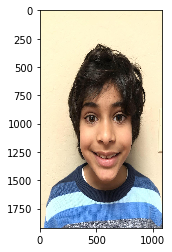

(1, 1920, 1080, 3)
(16, 1920, 1080, 3)
Prediction of image
[-2244.5032   -958.20166]
sad


In [4]:
#get predictions of test images
img = cv2.imread("/content/drive/My Drive/testriaan.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = np.array(img)
plt.figure()
plt.imshow(img)
plt.grid(False)
plt.show()
img = (np.expand_dims(img,0))
img = img.astype(float)
print(img.shape)
print(test_images.shape)


#probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = model.predict(img)


print("Prediction of image")
print(predictions[0])
print(class_names[np.argmax(predictions[0])])


